In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('personality_analysis.csv', sep = ';')

In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/19,58,635,...,0,0,0,0,0,1,NaN,NaN,NaN,NaN
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/21,38,11,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/20,26,426,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/21,26,11,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5324,1981,PhD,Married,58293.0,1,0,19/1/21,94,173,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/6/20,46,709,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/21,56,406,...,0,0,1,0,0,0,NaN,NaN,NaN,NaN
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/1/21,91,908,...,1,0,0,0,0,0,NaN,NaN,NaN,NaN
2238,8235,1956,Master,Together,69245.0,0,1,24/1/21,8,428,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
# Creating a new feature named Age by subtracting the Year_Birth from the current year 
data['Age'] = 2022 - data['Year_Birth']

In [5]:
data.isna().sum()

ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                   24
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Response                  0
Unnamed: 27            2240
Unnamed: 28            2240
Unnamed: 29            2240
Unnamed: 30            2240
Age                       0
dtype: int64

In [6]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Age'],
      dtype='object')

In [7]:
# Remove the empty columns of the dataset
empty_columns = [ 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30']
data = data.drop(empty_columns, axis=1)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/19,58,635,...,4,7,0,0,0,0,0,0,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/21,38,11,...,2,5,0,0,0,0,0,0,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/20,26,426,...,10,4,0,0,0,0,0,0,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/21,26,11,...,4,6,0,0,0,0,0,0,0,38
4,5324,1981,PhD,Married,58293.0,1,0,19/1/21,94,173,...,6,5,0,0,0,0,0,0,0,41


In [8]:
# Removing the rows where Income column has 'Nan' values. 
# There were 24 out of 2240 rows (0.01% of the total rows) so it is better to drop them than applying methods to fill themx
 
data = data.dropna()
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/19,58,635,...,4,7,0,0,0,0,0,0,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/21,38,11,...,2,5,0,0,0,0,0,0,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/20,26,426,...,10,4,0,0,0,0,0,0,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/21,26,11,...,4,6,0,0,0,0,0,0,0,38
4,5324,1981,PhD,Married,58293.0,1,0,19/1/21,94,173,...,6,5,0,0,0,0,0,0,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/6/20,46,709,...,4,5,0,0,0,0,0,0,0,55
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/21,56,406,...,5,7,0,0,0,1,0,0,0,76
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/1/21,91,908,...,13,6,0,1,0,0,0,0,0,41
2238,8235,1956,Master,Together,69245.0,0,1,24/1/21,8,428,...,10,3,0,0,0,0,0,0,0,66


## OUTLIER DETECTION
IQR = Q3 - Q1

The data points that are 1.5*IQR times further than the min or the max values of their respective range are considered as outliers 

In [9]:
data['Age'].describe()

count    2216.000000
mean       53.179603
std        11.985554
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

In [10]:
data['Age'].describe()

count    2216.000000
mean       53.179603
std        11.985554
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

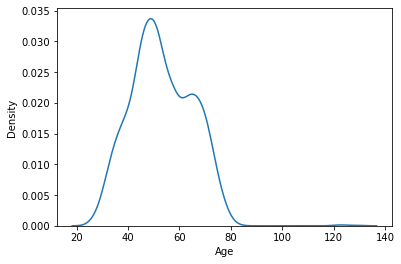

In [11]:
import seaborn as sns
sns.kdeplot(data['Age'])

In [12]:
Q3 = 63
Q1 = 45
IQR = Q3 - Q1
IQR
lower_bound_outliers = Q1 - 1.5*IQR
upper_bound_outliers = Q3 + 1.5*IQR
upper_bound_outliers
len(data[data['Age']>90])

3

In [21]:
def outlier_detector(dataframe,feature):

    # Quartile values extraction
    Q3 = dataframe['feature'].describe()['75%']
    Q1 = dataframe['feature'].describe()['25%']
    IQR = Q3 - Q1

    # Calculation of lower and upper values 
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # Calculating the count of outliers for the given feature
    lower_outliers_count = len(dataframe[dataframe['feature'] < lower_bound])
    upper_outliers_count = len(dataframe[dataframe['feature'] > upper_bound])

    return lower_outliers_count,upper_outliers_count

In [23]:
x = outlier_detector(data,Income)

NameError: name 'Income' is not defined